In [ ]:
#ref:https://tomkuo139.blogspot.com/2018/03/ai.html、https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-%E5%A4%9A%E5%B1%A4%E6%84%9F%E7%9F%A5%E6%A9%9F-multilayer-perceptron-mlp-%E5%90%AB%E8%A9%B3%E7%B4%B0%E6%8E%A8%E5%B0%8E-ee4f3d5d1b41
#深度學習基礎
'''
讓神經元變成多層的結構，模擬人類神經，且加上一層就不會是一直線
，非線性問題獲得解決
MLP(Multi-Layer Perceptron)
MLP主要由輸入層、隱藏層和輸出層所構成。

前向傳遞 (Forward propagation):
每一層都乘上一個權重相加以會進入下一個神經元，
每一個權重相加必須經過激勵函數(Logistic)神經元是否被啟動，當做隱藏層輸出是下層神經元
，經過多個隱藏層，隱藏層輸出的加權線性和到輸出層，在經過激勵函數得到推估值。

反向傳遞 (Backward propagation):
利用最後的目標函數(推估值)來進行參數w的更新，持續學習，直到參數或是誤差值收斂。

模型如何決定w:
梯度下降找出斜率等於的地方，隨便找個w值，沿著負梯度的方向前進走到等高線的最低點，稱作梯度下降

神經元如何決定多層的w:
使用反向傳播(Backpropagation)，但會算到Logistic函數的微分，Logistic函數的微分分佈在0-1之間，多神經元必須把0-1
的值乘上很多次造成梯度消失

梯度消失解決:
使用relu函數代替logistic函數，relu函數使函數為負的=0,函數正的不變


'''

In [ ]:
#ImportError: DLL load failed: 找不到指定的程序。
#!pip install protobuf==3.6.0

In [1]:
#使用內建mnist資料庫
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


In [2]:
#mnist.load_data()回傳值   ((訓練特徵,訓練目標),(測試特徵,測試目標))
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [3]:
print("訓練資料筆數",len(y_train))
print("測試資料筆數",len(y_test))


訓練資料筆數 60000
測試資料筆數 10000


In [4]:
#資料每張圖28*28pixel,pixel最大255(白)最小值0(黑)
print("特徵維度",x_train.shape)

特徵維度 (60000, 28, 28)


In [5]:
import pandas as pd
pd.set_option('display.max_rows',15)
pd.set_option('display.max_columns',10)
pd.DataFrame(x_train[5])

,0,1,2,3,4,...,23,24,25,26,27
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0
5,0,0,0,0,0,...,0,0,0,0,0
6,0,0,0,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21,0,0,0,0,0,...,0,0,0,0,0
22,0,0,0,0,0,...,0,0,0,0,0


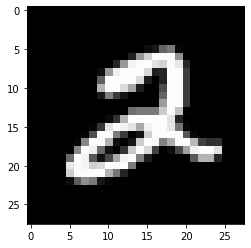

In [6]:
#看圖
plt.imshow(x_train[5],cmap='gray')

In [7]:
#標準化(把所有資料縮放到0-1之間)，若特徵區間太每次大梯度下降大，容易超過最低點
#輸出變成one-hot-encoding，因為深度學習的最後一層可以是多個神經元，看誰被激發的幅度較大答案就是誰
from keras.utils import np_utils
#reshape 28*28 變成 784*1的一維陣列 ，輸入層的每筆Data需是一維陣列
#除以255標準化至0-1的區間

x_train_shaped=x_train.reshape(60000,784).astype('float32') / 255
x_test_shaped = x_test.reshape(10000,784).astype('float32') / 255

#keras 要求分類的輸出必須換成One-HOt Encoding，MLP輸出層的每筆Data都是一維陣列

y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

輸入想看的可視化圖片[0-59999]10
你想看的圖片號碼是 10
圖片答案是 3


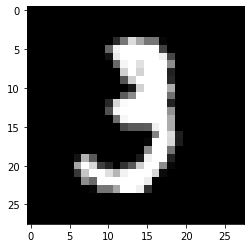

In [8]:
a = int(input("輸入想看的可視化圖片[0-59999]"))
print("你想看的圖片號碼是",a)
print("圖片答案是",y_train[a])
plt.imshow(x_train[a],cmap='gray')

In [ ]:
#建立模型
'''
建立模型的時候必須選擇一個model再將神經元一層一層疊上去

model選擇
keras有兩種模型,Sequential與Functional
Sequential使用比較簡單
Functional模型可以做出更多特別的設置，使用上會比較彈性

layer選擇
使用全連接層(Dense Layer) ，每個神經元都會貢獻給下一層的神經元

1.輸入層(最初層):有多少特徵就應該有多少神經元
2.隱藏層(中間層):經驗法則，需試出較佳值
3.輸出層(最後層):有多少分類要判斷就應該有幾個最後的神經元，透過激勵函數那個神經元被激發程度較大決定是那一種

W權重初始
使用梯度下降，一開始選擇一組隨機權重開始，這裡選擇使用常態分部random_normal作為w初始值

激勵函數
在層與層之間選擇relu函數避免梯度消失，最後一層以前選擇sigmoid(logistic函數)，logistic函數在單一判斷的時候沒問題，但多個判斷的時候所有
類別加起來不等於一，與認知的機率不同(一般機率相加等於一)，所以改使用softmax函數，跟sigmoidc很像但加起來會等於一
'''

In [9]:
from keras.models import Sequential
from keras.layers import Dense
# 開始建立Sequential順序模組
model = Sequential()
#加入輸入層、隱藏層
h_layer = Dense(input_dim = 784, # 輸入層有 28*28=784 個神經元
               units=256,      # 隱藏層有 256 個神經元 
               kernel_initializer = "random_normal",  # 使用random_normal初始化 weight權重與bias偏差值
               activation = 'relu')  # 使用 relu 激活函數
model.add(h_layer)

#加入輸出層不用input_dim,因為 Keras自動把上一層的units作為這一層的input_dim
o_layer = Dense(units = 10, # 輸出層有 10 個神經元，只有十種結果(數字0 ~ 9)
               kernel_initializer = "random_normal",
               activation = "softmax")  #使用softmax激活函數，值越高機率越大
model.add(o_layer)

W0626 17:34:36.451430  6640 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 17:34:36.522390  6640 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 17:34:36.524387  6640 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [10]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

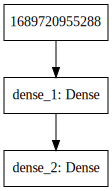

In [11]:
#劃出model圖
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [12]:
#使用summary查看參數
#Param的個數第一層256*784(28*28) = 20074，輸出層256*10=2560，每一個輸出配置一個bias常數(f = wx + b的常數b)來讓激勵函數保持一樣

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
## 設定模型的訓練方式
#optimizer 參數:傳統梯度下降有走太小步訓練很久，走太大步容易錯過最小值的缺點，adam參數對動量做出修該當斜率很大時盡量走快一點，斜率小則相反
#loss參數:預設在輸出時會告訴你loss是多少，使用accuracy:度量為正確率
model.compile(loss = "categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

W0626 17:34:50.510679  6640 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0626 17:34:50.530668  6640 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
'''
開始fit模型
loss:     使用訓練資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)
acc:      使用訓練資料, 得到的評估準確率    (值在 0~1, 值越大, 代表準確率越高)
val_loss: 使用驗證資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)
val_acc:  使用驗證資料, 得到的評估準確率    (值在 0~1, 值越大, 代表準確率越高)
'''

In [14]:
#訓練的歷史記錄, 會會回傳到指定變數train_history
train_history = model.fit(x=x_train_shaped,
                y=y_train_cat,
                validation_split=0.1,   #validation_split多少訓練，多少測驗
                epochs=20,              #epochs整個資料及看幾次
                batch_size=200,         #batch_size看過多少樣本更新ㄧ次梯度下降
                verbose= 2)             #verbose:0(步輸出訓練log),1(只輸出進度條),2(每個訓練訊息)

W0626 17:34:53.975389  6640 deprecation.py:323] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0626 17:34:54.017364  6640 deprecation_wrapper.py:119] From C:\Users\keneau\PycharmProjects\work\venv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/20
 - 2s - loss: 0.4158 - acc: 0.8884 - val_loss: 0.1812 - val_acc: 0.9525
Epoch 2/20
 - 1s - loss: 0.1774 - acc: 0.9498 - val_loss: 0.1208 - val_acc: 0.9663
Epoch 3/20
 - 1s - loss: 0.1250 - acc: 0.9642 - val_loss: 0.0985 - val_acc: 0.9713
Epoch 4/20
 - 1s - loss: 0.0957 - acc: 0.9721 - val_loss: 0.0870 - val_acc: 0.9758
Epoch 5/20
 - 1s - loss: 0.0757 - acc: 0.9784 - val_loss: 0.0814 - val_acc: 0.9768
Epoch 6/20
 - 1s - loss: 0.0614 - acc: 0.9827 - val_loss: 0.0798 - val_acc: 0.9772
Epoch 7/20
 - 1s - loss: 0.0501 - acc: 0.9862 - val_loss: 0.0727 - val_acc: 0.9785
Epoch 8/20
 - 1s - loss: 0.0415 - acc: 0.9887 - val_loss: 0.0661 - val_acc: 0.9797
Epoch 9/20
 - 1s - loss: 0.0350 - acc: 0.9909 - val_loss: 0.0678 - val_acc: 0.9802
Epoch 10/20
 - 1s - loss: 0.0291 - acc: 0.9927 - val_loss: 0.0680 - val_acc: 0.9792
Epoch 11/20
 - 1s - loss: 0.0244 - acc: 0.9938 - val_loss: 0.0689 - val_acc: 0.9800
Epoch 12/20
 - 1s - loss: 0.0196 - a

Text(0.5, 0, 'epochs')

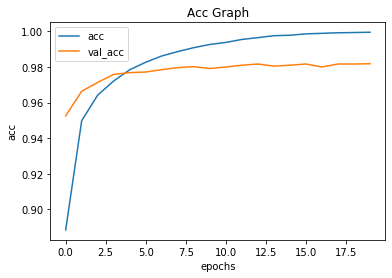

In [15]:
plt.plot(train_history.history["acc"])
plt.plot(train_history.history["val_acc"])
plt.title("Acc Graph")
plt.legend(['acc','val_acc'], loc='upper left')
plt.ylabel('acc')
plt.xlabel('epochs')

Text(0, 0.5, 'loss')

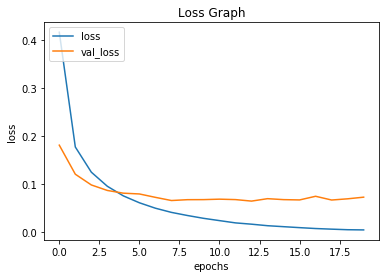

In [16]:
#loss跟模型跟所有訓練資料(切出的9/10)的正確答案差距，val_loss是模型跟切出來的驗證資料(1/10)正確答案的差距，
#通常val_loss沒大變動的時候就會停下，來避免過度訓練產生過擬合問題
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss','val_loss'], loc='upper left')
plt.xlabel( 'epochs' )
plt.ylabel( 'loss' )

In [17]:
#取五比看看
predict = model.predict_classes(x_test_shaped)
print("預測標籤",list(predict[:5]))
print("正確標籤",list(y_test)[:5])


預測標籤 [7, 2, 1, 0, 4]
正確標籤 [7, 2, 1, 0, 4]


In [18]:
e = model.evaluate(x_test_shaped,y_test_cat)
print("衡量係數",e)
print("正確率:",e[1]*100,'%')

10000/10000 [==============================] - 0s 17us/step
衡量係數 [0.07166148496138484, 0.9806]
正確率: 98.06 %


In [19]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict))

,0,1,2,3,4,5,6,7,8,9
0,971,0,1,1,1,2,1,1,1,1
1,0,1124,3,2,0,1,2,1,2,0
2,3,1,1007,5,2,0,3,4,6,1
3,1,0,2,1001,0,1,0,1,2,2
4,1,0,1,1,968,0,4,0,0,7
5,2,0,0,15,1,870,3,0,0,1
6,4,2,1,1,4,3,942,0,1,0
7,1,6,7,6,1,0,0,998,1,8
8,2,1,3,8,6,6,2,2,941,3
9,3,2,0,9,6,2,0,3,0,984


In [20]:
import pandas as pd
checkList = pd.DataFrame( {'label':y_test,       # Column1 名稱: 欄位值集合 (這裡提供 Label 真實數值)
                          'predict':predict      # Column2 名稱: 欄位值集合 (這裡提供 AI 預測結果)
                          }
                        )

In [21]:
#共有176筆資料預測錯誤
error_predict = checkList[checkList['predict'] != checkList['label']]
error_predict.head(5)

,label,predict
104,9,5
115,4,9
149,2,9
247,4,6
321,2,7


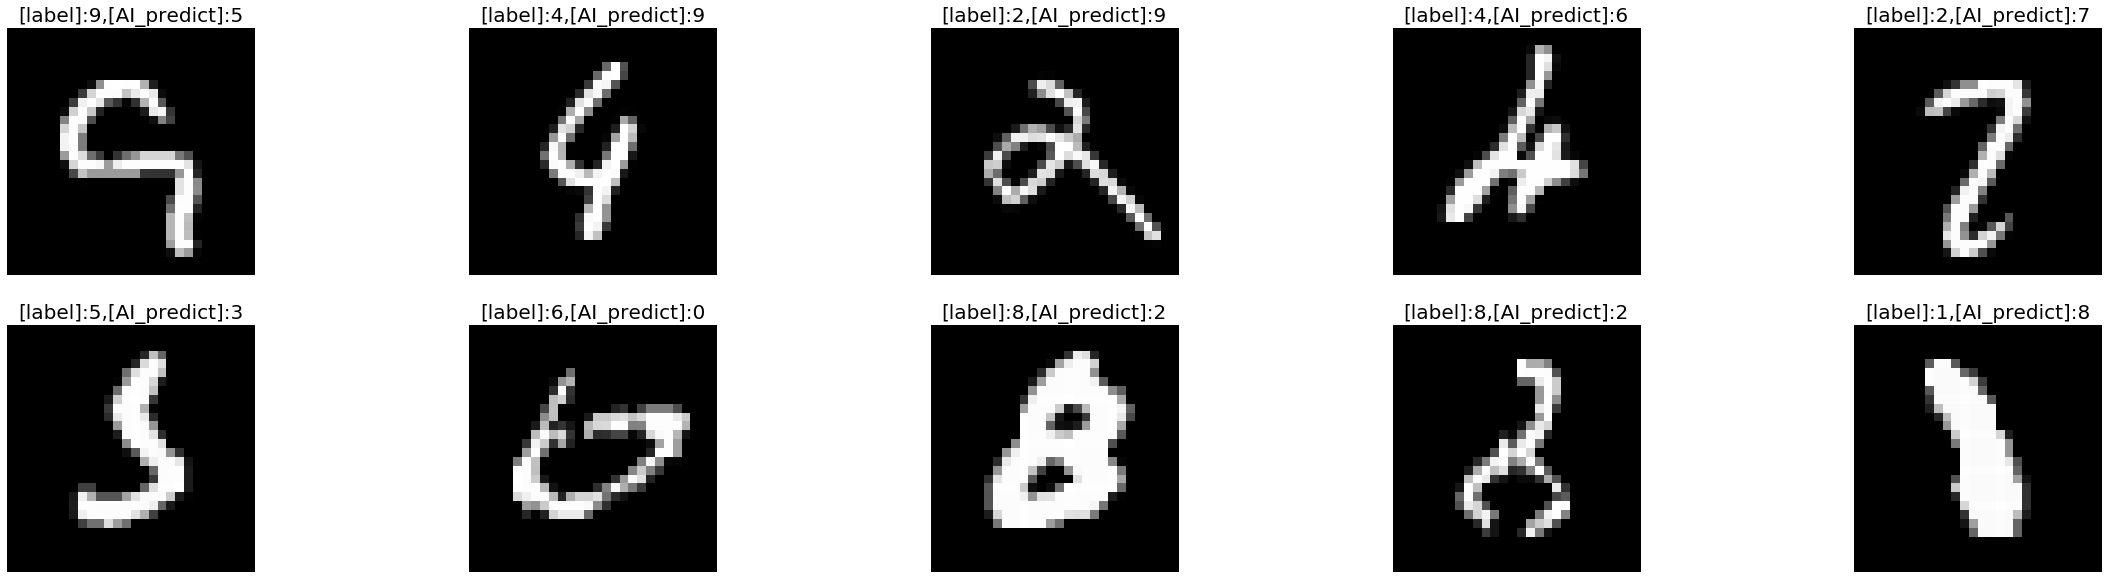

In [22]:
#檢視分類錯誤的資料長相
import math
img_list = error_predict.index.tolist()[:10]
loc=0
plt.figure(figsize=(40,10))
for i in img_list:
    loc += 1    
    plt.subplot( math.ceil(len(img_list)/5), 5, loc )
    # 畫布區分為(幾列, 幾欄, 目前在哪個位置)
    plt.title("[label]:" + str(error_predict['label'].tolist()[loc-1])+',' + "[AI_predict]:" + str(error_predict['predict'].tolist()[loc-1]),fontsize=20)
    plt.axis("off")
    plt.imshow(x_test[i],cmap='gray')    

In [ ]:
#可以藉由提高訓練次數、增加隱藏層的神經元數、增加隱藏層等，來提升確率